# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [21]:
temperature = df.temperature.values

1. Is the distribution of body temperatures normal? 

[<matplotlib.text.Text at 0x10fd56a90>, <matplotlib.text.Text at 0x10fd38710>]

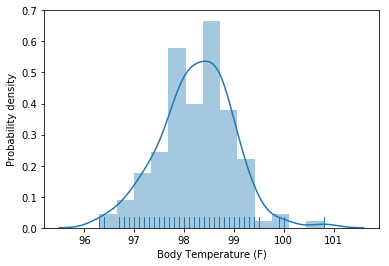

In [15]:
f = sns.distplot(temperature, rug = True);
f.set(xlabel = 'Body Temperature (F)', ylabel = 'Probability density')

In the previous plot, we can see that the temperature distribution doesn't look exactly normal, but to test that we can use the normaltest( ) test from scipy.

source: https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used

In [16]:
stats.normaltest(temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since the pvalue > 0.05 (second value in the previous tuple),
we conclude that the data is not normally distributed.

In [92]:
np.mean(temperature)

98.249230769230749

Q2: Is the sample size large?
    According to this source: https://www.qualtrics.com/blog/determining-sample-size/
    to calculate our ideal sample size we can use this formula:
        Necessary Sample Size = (Z-score)^2 * StdDev*(1-StdDev) / (margin of error)^2

We could make the following assumptions (as explained in the aboe source):

Z-score = 1.96 (corresponding Z-score for a 95% confidence interval)

StdDev = .5 (We could assume this value when we don't n=know the true population StDev')

margin of error = 0.05 (5% margin of error)

When using the above values with the previous formula we obtain Sample_Size = 384

Thus, the ssample dise (n = 130), is not large enough for the desired values as mentioned above.

3.Is the true population mean really 98.6 degrees F? 

Since the data is not normally distributed, and we don't know the population standar deviation, the most appropiate test would be a two-sided one-sample t-test where we compare our sample mean against 98.6 (suposed true human population mean temperature). The test should be two sided, since we have no reason to suspect the the our sample's mean might be higher or lower that the population's mean  (98.6)

In [27]:
print('The mean temperature of the sample is: '+str(np.mean(temperature))+ ' °F')

The mean temperature of the sample is: 98.2492307692 °F


In [41]:
# To performed a two-sided one-sample t-test, we can use the the ttest_1samp() test from scipy
t, pvalue1 = stats.ttest_1samp(temperature,98.6)
print('t-test pvalue = '+str(pvalue1))

t-test pvalue = 2.41063204156e-07


Since pvalue < 0.05, we can conclude that the population mean does not equal 98.6 °F.

In [33]:
# We can also try a one sample two-sided z test
d1 = sm.stats.DescrStatsW(temperature)

In [42]:
z, pvalue2  = d1.ztest_mean(98.6)
print('z-test pvalue = '+str(pvalue2))

z-test pvalue = 4.90215701411e-08


Again, since the z-test pvalue < 0.05, the population the population mean does not equal 98.6 °F.

AS explained here (http://www.differencebetween.net/miscellaneous/difference-between-z-test-and-t-test/)
when the sample size is large, the t-test becmomes similar to the z-test, but fluctuations may still occur.
However, in the t-test and z-test that we performed here, the pvalues are much smaller than 0. 
Thus the conclusion are broadly the same, that the poppulation's mean temperature is not 98.6 °F.

Q4: Draw a small sample of size 10 from the data and repeat both tests

In general, for sample size < 10 and unknown population standar deviation, the best choice is t-test.
source: https://www.linkedin.com/pulse/z-test-vs-t-test-arunmozhi-ilango/

In [65]:
#If we take 1 random sample we see the following:

random_sample_10 = np.random.choice(temperature, size = 10)
print('The mean of the random sample is: '+ str(np.mean(random_sample_10)))
t, pvalue1 = stats.ttest_1samp(random_sample_10,98.6)
d1 = sm.stats.DescrStatsW(random_sample_10)
z, pvalue2  = d1.ztest_mean(98.6)
print('t-test pvalue = '+str(pvalue1))
print('z-test pvalue = '+str(pvalue2))

The mean of the random sample is: 98.42
t-test pvalue = 0.503186663247
z-test pvalue = 0.485571585396


In [76]:
#On the other hand, if we take 1000 random samples, and plot the distribution of the respective pvalues,
#we see the following.

tp_val = []
zp_val = []

for _ in range(1000):
    random_sample_10 = np.random.choice(temperature, size = 10)
    #print('The mean of the random sample is: '+ str(np.mean(random_sample_10)))
    t, pvalue1 = stats.ttest_1samp(random_sample_10,98.6)
    d1 = sm.stats.DescrStatsW(random_sample_10)
    z, pvalue2  = d1.ztest_mean(98.6)
    #print('t-test pvalue = '+str(pvalue1))
    #print('z-test pvalue = '+str(pvalue2))
    tp_val.append(pvalue1)
    zp_val.append(pvalue2)


[<matplotlib.text.Text at 0x118718910>, <matplotlib.text.Text at 0x11870a6d0>]

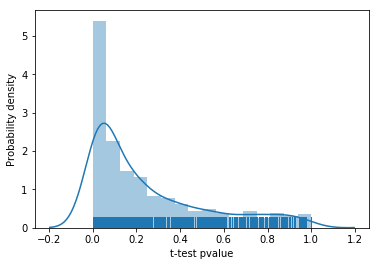

In [77]:
f = sns.distplot(tp_val, rug = True);
f.set(xlabel = 't-test pvalue', ylabel = 'Probability density')

[<matplotlib.text.Text at 0x119dac850>, <matplotlib.text.Text at 0x119d8f4d0>]

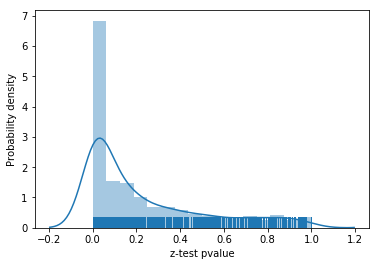

In [78]:
f = sns.distplot(zp_val, rug = True);
f.set(xlabel = 'z-test pvalue', ylabel = 'Probability density')

In [79]:
tp_val_s = [x for x in tp_val if x <0.05]
zp_val_s = [x for x in zp_val if x <0.05]
print('Number of significant pvalues for the t-test: '+str(len(tp_val_s)))
print('Number of significant pvalues for the z-test: '+str(len(zp_val_s)))

Number of significant pvalues for the t-test: 289
Number of significant pvalues for the z-test: 397


In general, the pvalues obtained for the t-test and z-test when applied to a single random sample are similar to each other.
Furthermore, when we repeat this process 1000 times, we can see that the distribution of the resulting pvalues are
very similar for both tests. However, given the small sample size (10), the correct test to apply is the t-test. 
Of note,it should be noticed that the resulting p-value depends on the particular sample being tested. In both cases, only 1/3 (approx) out of the 1000 random samples, show a significant difference (pvalue < 0.05)
from the hypothetical population mean (98.6).

Q5: At what temperature should we consider someone's temperature to be "abnormal"? 

In [80]:
t, pvalue1 = stats.ttest_1samp(temperature,98.6)
print('t-test pvalue = '+str(pvalue1))

t-test pvalue = 2.41063204156e-07


In [90]:
#To caulate the 95% confidence interval we can use the following method (.t.interval())
#from the stats package
x = temperature
R = stats.t.interval(0.95,len(x)-1,loc=np.mean(x),scale=np.std(x)/np.sqrt(len(x)))
a,b= R

In [91]:
#Thus, given the present sample, the confidence interval for the population's mean is:
print('The 95% confidence interval for the population mean is:')
print(R)
print(' ... And the margin of error (ME) is: '+str((b-a)/2))

The 95% confidence interval for the population mean is:
(98.122493188216382, 98.375968350245117)
 ... And the margin of error (ME) is: 0.126737581014


Based on the present sample, we could use the limits of the 95% confidence interval to discriminate normal or abnormal 
body temperature.That is, any body temperature that differs more thatn 0.13 (margin of error)
from the sample mean (98.25), could be considered abnormal.

Q6: Is there a significant difference between males and females in normal temperature? 

In [94]:
# First, we need to split the temperature data for males and females
temperature_m = df[df.gender == 'M'].temperature.values
temperature_f = df[df.gender == 'F'].temperature.values

print('The number of males is : '+str(len(temperature_m)))
print('The number of females is : '+str(len(temperature_f)))
print('The average male body temperature is : '+str(np.mean(temperature_m)))
print('The average female body temperature is : '+str(np.mean(temperature_f)))

The number of males is : 65
The number of females is : 65
The average male body temperature is : 98.1046153846
The average female body temperature is : 98.3938461538


In [95]:
t, p = stats.normaltest(temperature_m)
print(p)

0.640439907457


In [96]:
t, p = stats.normaltest(temperature_f)
print(p)

0.0936941938986


The last two pvalues > 0.05 show that neither the male or female body temepratures are normally distributed.
Also, because we don't know the male and femal population standar deviation for the body temperature,
the appropiate test here is a two-sided two-sample t-test. Here the null hypothesis is that the mean mody temperature 
of males and females is the same'. It is two sided, because we have no reason to suspect a possible direction for a difference in male or female body temperature.

In [98]:
#
t, pvalue = stats.ttest_ind(temperature_m, temperature_f)
print(pvalue)

0.0239318831224


Since pvalue < 0.05, we can conclude that the body temperatures of males and females is different. 
This might not be so surprising, since sexual dymorphism are common in biological phenomenae.
the present analysis also suggests that teh population average body temperature is 98.2 °F, as oposed to 98.6 °F